# Feature Engineering
# Klassifikation
# Regression
# Validierung und mehr
## Sampling und Resampling
## Validierungstechniken

In [2]:
## preparaton

## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## load data
datapath = '../3_data'
from os import chdir; chdir(datapath)
data = pd.read_csv('bank_data_prep.csv')
data.shape ## zur Kontrolle

## features - target - split
X = data.drop('y', axis=1)
y = data['y']

### Holdout Validierung

In [4]:
## repetition from classification and regression

## train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3,
    random_state=1234)

## train and score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8798296318831762


### Kreuzvalidierung

ref: https://scikit-learn.org/stable/modules/cross_validation.html

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=1234)

## cross validation
kfold = 10 ## default: 5
scores = cross_val_score(model, X, y, cv=kfold)

## combine call
#scores = cross_val_score(RandomForestClassifier(random_state=1234), X, y, cv=kfold)

mean: 0.8859026369168358
std:  0.010953816382393995


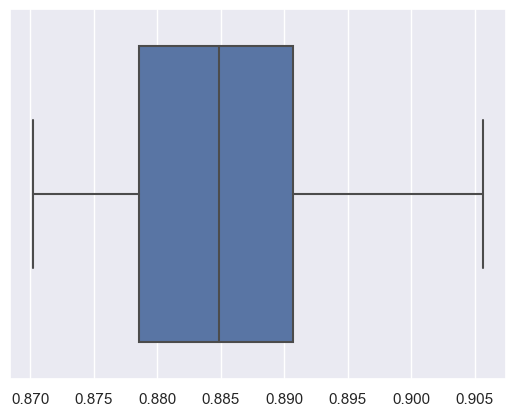

In [8]:
## results
print('mean:', np.mean(scores))
print('std: ', np.std(scores))
sns.boxplot(x=scores);

### Bootstrap Validierung

In [10]:
print(1 - 1 / np.exp(1))

0.6321205588285577


In [11]:
## experimental
pop_size = 1000000
pop = range(pop_size)
smpl = np.random.choice(pop, pop_size, replace=True)
smpl_size = len(np.unique(smpl))
print(smpl_size / pop_size)

0.632217


### Train - Eval - Test - Split